<a href="https://colab.research.google.com/github/ShunsakuKatsumata/Python-imagerecognition/blob/main/%E7%8A%AC%E7%8C%AB%E8%AA%8D%E8%AD%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データセット
https://www.microsoft.com/en-us/download/details.aspx?id=54765

# ライブラリのインポート

In [ ]:
# データ処理ライブラリ
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# 画像処理ライブラリ
import cv2

# 可視化ライブラリ
import matplotlib.pyplot as plt

# Pythonモジュール
import os
import glob
import shutil
import urllib.request
import random

# tensorflowライブラリ
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras import optimizers
from tensorflow.math import confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

# データセットの読み込み

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# zipfileを解凍
import zipfile

with zipfile.ZipFile('drive/My Drive/kagglecatsanddogs_5340.zip', 'r') as zip_ref:
  zip_ref.extractall('drive/My Drive/kagglecatsanddogs_5340')

# catsanddogsデータセットを分割する。

1.   学習データ(train)
2.   検証データ(val)
3.   テストデータ(test)

In [ ]:
# train用フォルダ作成
os.makedirs('drive/My Drive/train/dog', exist_ok=True)
os.makedirs('drive/My Drive/train/cat', exist_ok=True)

# val用フォルダ作成
os.makedirs('drive/My Drive/val/dog', exist_ok=True)
os.makedirs('drive/My Drive/val/cat', exist_ok=True)

# test用フォルダ作成
os.makedirs('drive/My Drive/test/dog', exist_ok=True)
os.makedirs('drive/My Drive/test/cat', exist_ok=True)

In [ ]:
# 犬・猫ごとのファイルパス一覧を取得
dog_images = glob.glob('drive/My Drive/kagglecatsanddogs_5340/PetImages/Dog/*.jpg')
cat_images = glob.glob('drive/My Drive/kagglecatsanddogs_5340/PetImages/Cat/*.jpg')

In [ ]:
# train, val, testにファイルを分割
idx_test = int(len(cat_images) * 0.8)
idx_val = int(idx_test * 0.8)

images_train_dog = dog_images[:idx_val]
images_train_cat = cat_images[:idx_val]

images_val_dog = dog_images[idx_val:idx_test]
images_val_cat = cat_images[idx_val:idx_test]

images_test_dog = dog_images[idx_test:]
images_test_cat = cat_images[idx_test:]

In [ ]:
# ファイルを移動する関数
def move_files(file_list, target_dir):
    for i in file_list:
        shutil.move(i, target_dir)

# ファイル移動
move_files(images_train_dog, 'drive/My Drive/train/dog/')
move_files(images_train_cat, 'drive/My Drive/train/cat/')
move_files(images_val_dog, 'drive/My Drive/val/dog/')
move_files(images_val_cat, 'drive/My Drive/val/cat/')
move_files(images_test_dog, 'drive/My Drive/test/dog/')
move_files(images_test_cat, 'drive/My Drive/test/cat/')

In [ ]:
# 各ファイル内の画像データが多すぎるので減らす

def delete_random_images(directory):
    # ディレクトリ内の全ての画像ファイルを取得
    image_files = [f for f in os.listdir(directory) if f.endswith('.jpg') or f.endswith('.png')]

    # 画像ファイルがない場合は、何もせずに戻る
    if not image_files:
        print("ディレクトリ内に画像ファイルが見つかりませんでした。")
        return

    # ランダムに画像ファイルを選び、全体の半分を選択
    num_files_to_delete = len(image_files) // 2
    files_to_delete = random.sample(image_files, num_files_to_delete)

    # 選択したファイルを削除
    for file in files_to_delete:
        os.remove(os.path.join(directory, file))
        print(f"{file}を削除しました。")


delete_random_images('drive/My Drive/train/dog/')
delete_random_images('drive/My Drive/train/cat/')
delete_random_images('drive/My Drive/val/dog/')
delete_random_images('drive/My Drive/val/cat/')
delete_random_images('drive/My Drive/test/dog/')
delete_random_images('drive/My Drive/test/cat/')

2696.jpgを削除しました。
1144.jpgを削除しました。
5335.jpgを削除しました。
11424.jpgを削除しました。
11261.jpgを削除しました。
1268.jpgを削除しました。
10316.jpgを削除しました。
5175.jpgを削除しました。
542.jpgを削除しました。
5232.jpgを削除しました。
3983.jpgを削除しました。
427.jpgを削除しました。
2847.jpgを削除しました。
2570.jpgを削除しました。
5900.jpgを削除しました。
2010.jpgを削除しました。
270.jpgを削除しました。
5246.jpgを削除しました。
10512.jpgを削除しました。
2314.jpgを削除しました。
1631.jpgを削除しました。
2571.jpgを削除しました。
5703.jpgを削除しました。
10853.jpgを削除しました。
287.jpgを削除しました。
12026.jpgを削除しました。
2907.jpgを削除しました。
4855.jpgを削除しました。
4640.jpgを削除しました。
4663.jpgを削除しました。
2632.jpgを削除しました。
4061.jpgを削除しました。
10491.jpgを削除しました。
10590.jpgを削除しました。
3537.jpgを削除しました。
5661.jpgを削除しました。
11166.jpgを削除しました。
2203.jpgを削除しました。
3890.jpgを削除しました。
2540.jpgを削除しました。
11244.jpgを削除しました。
5076.jpgを削除しました。
313.jpgを削除しました。
3160.jpgを削除しました。
11217.jpgを削除しました。
12346.jpgを削除しました。
5551.jpgを削除しました。
1944.jpgを削除しました。
10536.jpgを削除しました。
4759.jpgを削除しました。
1743.jpgを削除しました。
3755.jpgを削除しました。
10656.jpgを削除しました。
3031.jpgを削除しました。
2730.jpgを削除しました。
3881.jpgを削除しました。
12307.jpgを削除しました。
546.jpgを削除しました。
11586

# 前処理

In [ ]:
# 分類するクラス
cf = ['dog', 'cat']
len_cf = len(cf)

# データのディレクトリ
train_data = '/content/drive/MyDrive/train'
val_data = '/content/drive/MyDrive/val'
test_data = '/content/drive/MyDrive/test'

# 学習回数
epochs = 4

# バッチサイズ指定(まとめて入力するデータ数)
batch_size = 16

# 画像サイズ指定
img_width, img_height = 224, 224

In [ ]:
'''
ImageDataGeneratorの作成
'''

# 学習データのImageDataGenerator作成
train_datagen = ImageDataGenerator(
    # データ拡張
    rotation_range=10,  # 画像をランダムに回転する範囲（度数）
    width_shift_range=0.1,  # 画像を水平方向にランダムにシフトする範囲
    height_shift_range=0.1,  # 画像を垂直方向にランダムにシフトする範囲
    zoom_range=0.1,  # 画像をランダムに拡大・縮小する範囲
    horizontal_flip=True , # 画像をランダムに水平方向に反転する
    rescale=1.0 / 255)  # rescaleで各画素のスケールを0～255から0～1に変換

train_generator = train_datagen.flow_from_directory(
    directory = train_data, #学習データ
    target_size = (img_width, img_height), #画像サイズ
    color_mode = 'rgb', #カラータイプ
    classes = cf, #クラス(0, 1)
    class_mode = 'categorical',
    batch_size = batch_size #まとめて入力するデータ数
)

# 検証データのImageDataGenerator作成
val_datagen = ImageDataGenerator(rescale=1.0 / 255)
val_generator = val_datagen.flow_from_directory(
    directory = val_data,
    target_size = (img_width, img_height),
    color_mode = 'rgb',
    classes = cf,
    class_mode = 'categorical',
    batch_size = batch_size
)

# 評価データのImageDataGenerator作成
test_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_generator = test_datagen.flow_from_directory(
    directory = test_data,
    target_size = (img_width, img_height),
    color_mode = 'rgb',
    classes = cf,
    class_mode = 'categorical',
    shuffle = False
)

Found 2000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Found 626 images belonging to 2 classes.


# 学習

VGG16を転移学習

In [ ]:
#学習済みモデルVGG16の読み込み

input_tensor = Input(shape=(img_width, img_height, 3))
VGG16 = VGG16(include_top=False, weights='imagenet', input_tensor=input_tensor)

ValueError: ignored

In [ ]:
# VGG16のパラメータを凍結(すべての層を凍結)
for layer in VGG16.layers:
    layer.trainable = False

In [ ]:
# 差し替え用の新しい層を追加
model = Sequential()
model.add(VGG16)
model.add(Flatten())
model.add(Dense(len_cf, activation='softmax'))

In [ ]:
# 構築モデルの概要を表示
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_3 (Dense)             (None, 2)                 50178     
                                                                 
Total params: 14,764,866
Trainable params: 50,178
Non-trainable params: 14,714,688
_________________________________________________________________


クロスエントロピー：2つの確率分布がどれくらい「離れているか」を表す指標。は2つの確率分布が似ているほど小さな値になる

Adam：RMSProp × Momentum のような最適化手法

accuracy：予測がどれだけ正しかったかを見る指標



In [ ]:
'''
学習方法を設定する
損失関数(loss) = クロスエントロピー
最適化アルゴリズム(optimizer) = Adam
学習中の評価指標(metrics) = accuracy
を設定。
'''

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-3),
              metrics=['accuracy'])

In [ ]:
'''
学習
'''

# ステップ数 = 全データ数 / バッチサイズ
steps = int(len(train_generator.classes) / batch_size)

result = model.fit(
    x = train_generator,  # 学習データ
    steps_per_epoch = steps,  # ステップ数
    epochs = epochs,  # エポック数
    validation_data = val_generator  # 検証データ
)

Epoch 1/4
125/125 [==============================] - 43s 336ms/step - loss: 0.4821 - accuracy: 0.7950 - val_loss: 0.3881 - val_accuracy: 0.8400
Epoch 2/4
125/125 [==============================] - 36s 286ms/step - loss: 0.2409 - accuracy: 0.9065 - val_loss: 0.4240 - val_accuracy: 0.8280
Epoch 3/4
125/125 [==============================] - 35s 282ms/step - loss: 0.2349 - accuracy: 0.8955 - val_loss: 0.2627 - val_accuracy: 0.9020
Epoch 4/4
125/125 [==============================] - 36s 291ms/step - loss: 0.2561 - accuracy: 0.9015 - val_loss: 0.2755 - val_accuracy: 0.8940



1.   loss = 学習データで予測した場合の損失関数
2.   accuracy = 学習データにて、正しく予測できた画像数の割合
3.  val_loss = 検証データで予測した場合の損失関数
4.  val_accuracy = 検証データにて、正しく予測できた画像数の割合

# 評価

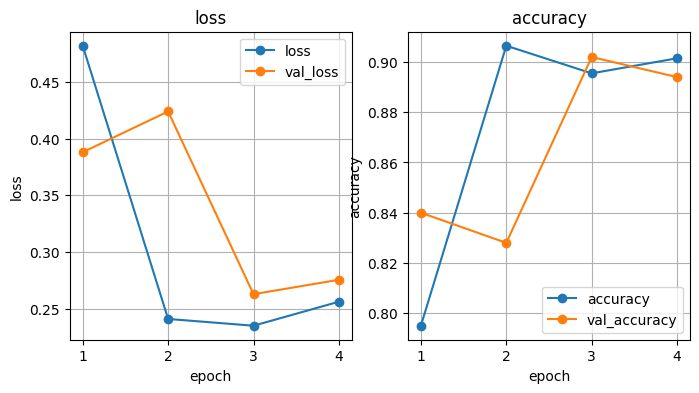

In [ ]:
'''
過学習してないかグラフで確認
'''

# グラフ描画(2画面)
plt.figure(figsize=(8, 4))

# epochごとのlossを表示
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs+1), result.history['loss'], '-o')
plt.plot(range(1, epochs+1), result.history['val_loss'], '-o')
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()
plt.legend(['loss', 'val_loss'], loc='best')

# epochごとのaccuracyを表示
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs+1), result.history['accuracy'], '-o')
plt.plot(range(1, epochs+1), result.history['val_accuracy'], '-o')
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend(['accuracy', 'val_accuracy'], loc='best')

# グラフ表示
plt.show()

In [ ]:
model.evaluate(test_generator)

20/20 [==============================] - 11s 320ms/step - loss: 0.1860 - accuracy: 0.9297


[0.18599820137023926, 0.9297124743461609]

In [ ]:
# 正解のラベル一覧を作成
true = test_generator.classes
true

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# 予測のラベル一覧を作成
p = model.predict(test_generator)
pred = np.argmax(p, axis=1)
pred

20/20 [==============================] - 3s 141ms/step


array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [ ]:
# 混同行列表示
confusion_matrix(true, pred)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[281,  32],
       [ 12, 301]], dtype=int32)>

In [ ]:
# 犬クラスの評価
print('precision:', precision_score(true, pred))
print('recall:', recall_score(true, pred))
print('f1_score:', f1_score(true, pred))

precision: 0.9039039039039038
recall: 0.9616613418530351
f1_score: 0.9318885448916407


In [ ]:
# 猫クラスの評価
print('precision:', precision_score(true, pred, pos_label=0))
print('recall:', recall_score(true, pred, pos_label=0))
print('f1_score:', f1_score(true, pred, pos_label=0))

precision: 0.9590443686006825
recall: 0.8977635782747604
f1_score: 0.9273927392739274


# 分析画像のアップロード

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dog.jpg to dog.jpg


1/1 [==============================] - 1s 1s/step
犬🐕


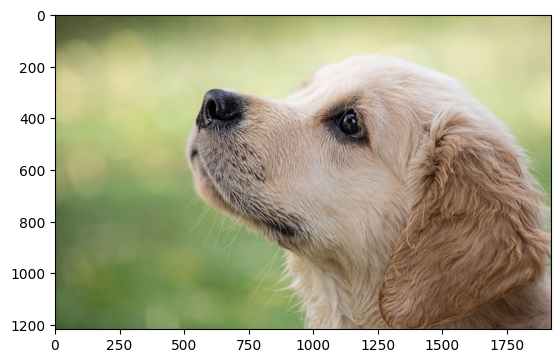

In [ ]:
img_path = 'dog.jpg'  # 分析する画像のパス(適宜書き換えてください)
img = image.load_img(img_path, target_size=(224, 224))
X = image.img_to_array(img)
X = np.expand_dims(X, axis=0)
X = preprocess_input(X)

# 予測を実行
predictions = model.predict(X)

# 結果の表示
if predictions[0][0] > 0.5:
    print("犬🐕")
else:
    print("猫🐈")

#分析画像をBGRからRGBに変更して表示(変更しないと色が変)
img = cv2.imread(img_path, 1)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)